# Chargement des librairies

In [1]:
from __future__ import absolute_import, division, print_function

import os
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.python.tools import freeze_graph
from tensorflow.python.tools import optimize_for_inference_lib

import numpy as np
import pandas as pd

import csv

print("TensorFlow version: {}".format(tf.VERSION))

Instructions for updating:
Use the retry module or similar alternatives.
TensorFlow version: 1.7.0


# Récupération des données

In [2]:
def split_data(data):
#Fonction qui permet de séparer un tableau de données en features et en labels    
    print("La taille des données est ",Train_Iris_Data.shape)
    print(data)
    data=np.array(data)
    #print(Train_Iris_Data)

    features = data[:,:-1]
    labels = data[:,-1:]
    labels = labels.reshape((-1,))

    return features,labels

#L'url où sont contenue les données de fleurs
train_dataset_url = "http://download.tensorflow.org/data/iris_training.csv"
#Téléchargement des données
Train_Iris_Data = pd.read_csv(train_dataset_url)
#Séparation en features et en label
features, labels = split_data(Train_Iris_Data)
print(features)
print(labels)

#L'url où sont contenue les données de test
test_url = "http://download.tensorflow.org/data/iris_test.csv"
#Téléchargement des données de test
Test_Iris_Data = pd.read_csv(test_url)
#Séparation en features et en label
features_test, labels_test = split_data(Test_Iris_Data)

La taille des données est  (120, 5)
     120    4  setosa  versicolor  virginica
0    6.4  2.8     5.6         2.2          2
1    5.0  2.3     3.3         1.0          1
2    4.9  2.5     4.5         1.7          2
3    4.9  3.1     1.5         0.1          0
4    5.7  3.8     1.7         0.3          0
5    4.4  3.2     1.3         0.2          0
6    5.4  3.4     1.5         0.4          0
7    6.9  3.1     5.1         2.3          2
8    6.7  3.1     4.4         1.4          1
9    5.1  3.7     1.5         0.4          0
10   5.2  2.7     3.9         1.4          1
11   6.9  3.1     4.9         1.5          1
12   5.8  4.0     1.2         0.2          0
13   5.4  3.9     1.7         0.4          0
14   7.7  3.8     6.7         2.2          2
15   6.3  3.3     4.7         1.6          1
16   6.8  3.2     5.9         2.3          2
17   7.6  3.0     6.6         2.1          2
18   6.4  3.2     5.3         2.3          2
19   5.7  4.4     1.5         0.4          0
20   6.7  3.3     5

In [3]:
# Exemple d'une seule donnée
print("example features:", features[0])
print("example label:", labels[0])

example features: [ 6.4  2.8  5.6  2.2]
example label: 2.0


# Création du modèle de réseau de neurone

In [4]:
# Initialiser les placeholders
x = tf.placeholder(dtype = tf.float32, shape = [None, 4], name = "input")
y = tf.placeholder(dtype = tf.int32, shape = [None], name="label")

#Fonction pour une couche relu
def add_dense_hidden_layer_op(x, num_neurons_previous_layer, num_neurons_current_layer, name_scope="relu"):
    with tf.name_scope(name_scope):
        # Model parameters
        weights = tf.Variable(tf.truncated_normal(shape=[num_neurons_previous_layer, num_neurons_current_layer], stddev=0.1, name="weights"))
        biases = tf.Variable(tf.Variable(tf.zeros([num_neurons_current_layer]), name="biases"))
        # Activation function
        relu = tf.nn.relu(tf.matmul(x, weights) + biases, name="relu")
        # TensorBoard Summary
        tf.summary.histogram(relu.op.name + '/activations', relu)  
        return relu

# Fonction pour une couche Softmax
def add_softmax_op(x, num_neurons_previous_layer, num_classes, name_scope="softmax"):
    with tf.name_scope(name_scope):
        # Model parameters
        weights = tf.Variable(tf.zeros([num_neurons_previous_layer, num_classes]),name="weight")
        biases = tf.Variable(tf.zeros([num_classes]),name="biases")
        # Logits and softmax layer
        logits = tf.matmul(x, weights) + biases
        softmax = tf.nn.softmax(logits, name = "final_result")
        # TensorBoard Summary
        tf.summary.histogram(softmax.op.name + '/activations', softmax)
        return softmax, logits

#Fabrication du réseau de neurone
dense = add_dense_hidden_layer_op(x=x, num_neurons_previous_layer=4, num_neurons_current_layer=10, name_scope="dense")
dense2 = add_dense_hidden_layer_op(x=dense, num_neurons_previous_layer=10, num_neurons_current_layer=10, name_scope="dense2")
softmax, logits = add_softmax_op(x=dense2, num_neurons_previous_layer=10, num_classes=3, name_scope="softmax")


with tf.name_scope("Loss"):
    # Calcul de la fonction de coût
    loss = tf.reduce_mean( tf.nn.sparse_softmax_cross_entropy_with_logits (labels = y, 
                                                                    logits = logits,name="cross_entropy"))
    # Pour afficher dans tensorBoard
    tf.summary.histogram(loss.op.name, loss)
    
with tf.name_scope("Train"):
    # La fonction d'optimisation
    train_op = tf.train.GradientDescentOptimizer(learning_rate= 0.005).minimize(loss)
    
with tf.name_scope("accuracy"):
    # Trouve l'indice de la sortie la plus élevée, donc le label prédit
    pred = tf.argmax(softmax, 1, name = "out")
    # Calcul le taux de prédiction correct
    correct_prediction = tf.equal(tf.cast(pred, tf.int32), y)
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# L'opérateur qui permet d'afficher les variables dans TensorBoard
merged = tf.summary.merge_all()
# L'opérateur qui permet de sauvegarder le modèle
saver = tf.train.Saver()

# Entrainement du modèle

 Epoch : 0  Loss:  1.0986  Accuracy:  0.7 Accuracy Test:  0.533333
 Epoch : 10  Loss:  1.09845  Accuracy:  0.7 Accuracy Test:  0.533333
 Epoch : 20  Loss:  1.0983  Accuracy:  0.7 Accuracy Test:  0.533333
 Epoch : 30  Loss:  1.09815  Accuracy:  0.7 Accuracy Test:  0.533333
 Epoch : 40  Loss:  1.09801  Accuracy:  0.7 Accuracy Test:  0.533333
 Epoch : 50  Loss:  1.09787  Accuracy:  0.7 Accuracy Test:  0.533333
 Epoch : 60  Loss:  1.09773  Accuracy:  0.7 Accuracy Test:  0.533333
 Epoch : 70  Loss:  1.09759  Accuracy:  0.7 Accuracy Test:  0.533333
 Epoch : 80  Loss:  1.09746  Accuracy:  0.7 Accuracy Test:  0.533333
 Epoch : 90  Loss:  1.09733  Accuracy:  0.7 Accuracy Test:  0.533333
 Epoch : 100  Loss:  1.09719  Accuracy:  0.7 Accuracy Test:  0.533333
 Epoch : 110  Loss:  1.09706  Accuracy:  0.7 Accuracy Test:  0.533333
 Epoch : 120  Loss:  1.09693  Accuracy:  0.7 Accuracy Test:  0.533333
 Epoch : 130  Loss:  1.0968  Accuracy:  0.7 Accuracy Test:  0.533333
 Epoch : 140  Loss:  1.09667  Accu

 Epoch : 1210  Loss:  0.982188  Accuracy:  0.7 Accuracy Test:  0.533333
 Epoch : 1220  Loss:  0.976289  Accuracy:  0.7 Accuracy Test:  0.533333
 Epoch : 1230  Loss:  0.970066  Accuracy:  0.7 Accuracy Test:  0.533333
 Epoch : 1240  Loss:  0.963504  Accuracy:  0.7 Accuracy Test:  0.533333
 Epoch : 1250  Loss:  0.956587  Accuracy:  0.7 Accuracy Test:  0.533333
 Epoch : 1260  Loss:  0.949302  Accuracy:  0.7 Accuracy Test:  0.533333
 Epoch : 1270  Loss:  0.941641  Accuracy:  0.7 Accuracy Test:  0.533333
 Epoch : 1280  Loss:  0.933595  Accuracy:  0.7 Accuracy Test:  0.533333
 Epoch : 1290  Loss:  0.925148  Accuracy:  0.7 Accuracy Test:  0.533333
 Epoch : 1300  Loss:  0.916294  Accuracy:  0.7 Accuracy Test:  0.533333
 Epoch : 1310  Loss:  0.907038  Accuracy:  0.7 Accuracy Test:  0.533333
 Epoch : 1320  Loss:  0.897372  Accuracy:  0.7 Accuracy Test:  0.533333
 Epoch : 1330  Loss:  0.887299  Accuracy:  0.7 Accuracy Test:  0.533333
 Epoch : 1340  Loss:  0.876823  Accuracy:  0.7 Accuracy Test:  0

 Epoch : 2330  Loss:  0.291158  Accuracy:  0.95 Accuracy Test:  0.966667
 Epoch : 2340  Loss:  0.288479  Accuracy:  0.95 Accuracy Test:  0.966667
 Epoch : 2350  Loss:  0.285816  Accuracy:  0.95 Accuracy Test:  0.966667
 Epoch : 2360  Loss:  0.28317  Accuracy:  0.95 Accuracy Test:  0.966667
 Epoch : 2370  Loss:  0.280541  Accuracy:  0.95 Accuracy Test:  0.966667
 Epoch : 2380  Loss:  0.277928  Accuracy:  0.95 Accuracy Test:  0.966667
 Epoch : 2390  Loss:  0.275333  Accuracy:  0.95 Accuracy Test:  0.966667
 Epoch : 2400  Loss:  0.272757  Accuracy:  0.958333 Accuracy Test:  0.966667
 Epoch : 2410  Loss:  0.2702  Accuracy:  0.958333 Accuracy Test:  0.966667
 Epoch : 2420  Loss:  0.267663  Accuracy:  0.958333 Accuracy Test:  0.966667
 Epoch : 2430  Loss:  0.265145  Accuracy:  0.958333 Accuracy Test:  0.966667
 Epoch : 2440  Loss:  0.262648  Accuracy:  0.958333 Accuracy Test:  0.966667
 Epoch : 2450  Loss:  0.260171  Accuracy:  0.958333 Accuracy Test:  0.966667
 Epoch : 2460  Loss:  0.257716

 Epoch : 3480  Loss:  0.122509  Accuracy:  0.983333 Accuracy Test:  0.966667
 Epoch : 3490  Loss:  0.121957  Accuracy:  0.983333 Accuracy Test:  0.966667
 Epoch : 3500  Loss:  0.121414  Accuracy:  0.983333 Accuracy Test:  0.966667
 Epoch : 3510  Loss:  0.120878  Accuracy:  0.983333 Accuracy Test:  0.966667
 Epoch : 3520  Loss:  0.120349  Accuracy:  0.983333 Accuracy Test:  0.966667
 Epoch : 3530  Loss:  0.119828  Accuracy:  0.983333 Accuracy Test:  0.966667
 Epoch : 3540  Loss:  0.119314  Accuracy:  0.983333 Accuracy Test:  0.966667
 Epoch : 3550  Loss:  0.118806  Accuracy:  0.983333 Accuracy Test:  0.966667
 Epoch : 3560  Loss:  0.118306  Accuracy:  0.983333 Accuracy Test:  0.966667
 Epoch : 3570  Loss:  0.117813  Accuracy:  0.983333 Accuracy Test:  0.966667
 Epoch : 3580  Loss:  0.117326  Accuracy:  0.983333 Accuracy Test:  0.966667
 Epoch : 3590  Loss:  0.116846  Accuracy:  0.983333 Accuracy Test:  0.966667
 Epoch : 3600  Loss:  0.116372  Accuracy:  0.983333 Accuracy Test:  0.966667

 Epoch : 4600  Loss:  0.0886788  Accuracy:  0.983333 Accuracy Test:  0.966667
 Epoch : 4610  Loss:  0.0885188  Accuracy:  0.983333 Accuracy Test:  0.966667
 Epoch : 4620  Loss:  0.0883602  Accuracy:  0.983333 Accuracy Test:  0.966667
 Epoch : 4630  Loss:  0.0882029  Accuracy:  0.983333 Accuracy Test:  0.966667
 Epoch : 4640  Loss:  0.088047  Accuracy:  0.983333 Accuracy Test:  0.966667
 Epoch : 4650  Loss:  0.0878923  Accuracy:  0.983333 Accuracy Test:  0.966667
 Epoch : 4660  Loss:  0.087739  Accuracy:  0.983333 Accuracy Test:  0.966667
 Epoch : 4670  Loss:  0.0875869  Accuracy:  0.983333 Accuracy Test:  0.966667
 Epoch : 4680  Loss:  0.087436  Accuracy:  0.983333 Accuracy Test:  0.966667
 Epoch : 4690  Loss:  0.0872864  Accuracy:  0.983333 Accuracy Test:  0.966667
 Epoch : 4700  Loss:  0.087138  Accuracy:  0.983333 Accuracy Test:  0.966667
 Epoch : 4710  Loss:  0.0869908  Accuracy:  0.983333 Accuracy Test:  0.966667
 Epoch : 4720  Loss:  0.0868449  Accuracy:  0.983333 Accuracy Test: 

 Epoch : 5660  Loss:  0.0769329  Accuracy:  0.983333 Accuracy Test:  0.966667
 Epoch : 5670  Loss:  0.0768564  Accuracy:  0.983333 Accuracy Test:  0.966667
 Epoch : 5680  Loss:  0.0767803  Accuracy:  0.983333 Accuracy Test:  0.966667
 Epoch : 5690  Loss:  0.0767047  Accuracy:  0.983333 Accuracy Test:  0.966667
 Epoch : 5700  Loss:  0.0766296  Accuracy:  0.983333 Accuracy Test:  0.966667
 Epoch : 5710  Loss:  0.0765548  Accuracy:  0.983333 Accuracy Test:  0.966667
 Epoch : 5720  Loss:  0.0764804  Accuracy:  0.983333 Accuracy Test:  0.966667
 Epoch : 5730  Loss:  0.0764065  Accuracy:  0.983333 Accuracy Test:  0.966667
 Epoch : 5740  Loss:  0.076333  Accuracy:  0.983333 Accuracy Test:  0.966667
 Epoch : 5750  Loss:  0.0762599  Accuracy:  0.983333 Accuracy Test:  0.966667
 Epoch : 5760  Loss:  0.0761872  Accuracy:  0.983333 Accuracy Test:  0.966667
 Epoch : 5770  Loss:  0.0761149  Accuracy:  0.983333 Accuracy Test:  0.966667
 Epoch : 5780  Loss:  0.076043  Accuracy:  0.983333 Accuracy Test

 Epoch : 6720  Loss:  0.0706709  Accuracy:  0.983333 Accuracy Test:  0.966667
 Epoch : 6730  Loss:  0.0706253  Accuracy:  0.983333 Accuracy Test:  0.966667
 Epoch : 6740  Loss:  0.0705798  Accuracy:  0.983333 Accuracy Test:  0.966667
 Epoch : 6750  Loss:  0.0705345  Accuracy:  0.983333 Accuracy Test:  0.966667
 Epoch : 6760  Loss:  0.0704895  Accuracy:  0.983333 Accuracy Test:  0.966667
 Epoch : 6770  Loss:  0.0704445  Accuracy:  0.983333 Accuracy Test:  0.966667
 Epoch : 6780  Loss:  0.0703998  Accuracy:  0.983333 Accuracy Test:  0.966667
 Epoch : 6790  Loss:  0.0703553  Accuracy:  0.983333 Accuracy Test:  0.966667
 Epoch : 6800  Loss:  0.0703109  Accuracy:  0.983333 Accuracy Test:  0.966667
 Epoch : 6810  Loss:  0.0702668  Accuracy:  0.983333 Accuracy Test:  0.966667
 Epoch : 6820  Loss:  0.0702228  Accuracy:  0.983333 Accuracy Test:  0.966667
 Epoch : 6830  Loss:  0.0701789  Accuracy:  0.983333 Accuracy Test:  0.966667
 Epoch : 6840  Loss:  0.0701353  Accuracy:  0.983333 Accuracy Te

 Epoch : 7800  Loss:  0.0666154  Accuracy:  0.983333 Accuracy Test:  0.966667
 Epoch : 7810  Loss:  0.0665844  Accuracy:  0.983333 Accuracy Test:  0.966667
 Epoch : 7820  Loss:  0.0665536  Accuracy:  0.983333 Accuracy Test:  0.966667
 Epoch : 7830  Loss:  0.0665228  Accuracy:  0.983333 Accuracy Test:  0.966667
 Epoch : 7840  Loss:  0.0664921  Accuracy:  0.983333 Accuracy Test:  0.966667
 Epoch : 7850  Loss:  0.0664615  Accuracy:  0.983333 Accuracy Test:  0.966667
 Epoch : 7860  Loss:  0.066431  Accuracy:  0.983333 Accuracy Test:  0.966667
 Epoch : 7870  Loss:  0.0664006  Accuracy:  0.983333 Accuracy Test:  0.966667
 Epoch : 7880  Loss:  0.0663703  Accuracy:  0.983333 Accuracy Test:  0.966667
 Epoch : 7890  Loss:  0.0663401  Accuracy:  0.983333 Accuracy Test:  0.966667
 Epoch : 7900  Loss:  0.06631  Accuracy:  0.983333 Accuracy Test:  0.966667
 Epoch : 7910  Loss:  0.06628  Accuracy:  0.983333 Accuracy Test:  0.966667
 Epoch : 7920  Loss:  0.06625  Accuracy:  0.983333 Accuracy Test:  0.

 Epoch : 8860  Loss:  0.0637791  Accuracy:  0.983333 Accuracy Test:  0.966667
 Epoch : 8870  Loss:  0.0637559  Accuracy:  0.983333 Accuracy Test:  0.966667
 Epoch : 8880  Loss:  0.0637328  Accuracy:  0.983333 Accuracy Test:  0.966667
 Epoch : 8890  Loss:  0.0637098  Accuracy:  0.983333 Accuracy Test:  0.966667
 Epoch : 8900  Loss:  0.0636867  Accuracy:  0.983333 Accuracy Test:  0.966667
 Epoch : 8910  Loss:  0.0636637  Accuracy:  0.983333 Accuracy Test:  0.966667
 Epoch : 8920  Loss:  0.0636408  Accuracy:  0.983333 Accuracy Test:  0.966667
 Epoch : 8930  Loss:  0.063618  Accuracy:  0.983333 Accuracy Test:  0.966667
 Epoch : 8940  Loss:  0.0635952  Accuracy:  0.983333 Accuracy Test:  0.966667
 Epoch : 8950  Loss:  0.0635724  Accuracy:  0.983333 Accuracy Test:  0.966667
 Epoch : 8960  Loss:  0.0635498  Accuracy:  0.983333 Accuracy Test:  0.966667
 Epoch : 8970  Loss:  0.0635271  Accuracy:  0.983333 Accuracy Test:  0.966667
 Epoch : 8980  Loss:  0.0635045  Accuracy:  0.983333 Accuracy Tes

 Epoch : 9960  Loss:  0.0615095  Accuracy:  0.983333 Accuracy Test:  0.966667
 Epoch : 9970  Loss:  0.0614911  Accuracy:  0.983333 Accuracy Test:  0.966667
 Epoch : 9980  Loss:  0.0614727  Accuracy:  0.983333 Accuracy Test:  0.966667
 Epoch : 9990  Loss:  0.0614544  Accuracy:  0.983333 Accuracy Test:  0.966667
 Epoch : 10000  Loss:  0.061436  Accuracy:  0.983333 Accuracy Test:  0.966667
 Epoch : 10010  Loss:  0.0614177  Accuracy:  0.983333 Accuracy Test:  0.966667
 Epoch : 10020  Loss:  0.0613995  Accuracy:  0.983333 Accuracy Test:  0.966667
 Epoch : 10030  Loss:  0.0613812  Accuracy:  0.983333 Accuracy Test:  0.966667
 Epoch : 10040  Loss:  0.061363  Accuracy:  0.983333 Accuracy Test:  0.966667
 Epoch : 10050  Loss:  0.0613449  Accuracy:  0.983333 Accuracy Test:  0.966667
 Epoch : 10060  Loss:  0.0613267  Accuracy:  0.983333 Accuracy Test:  0.966667
 Epoch : 10070  Loss:  0.0613086  Accuracy:  0.983333 Accuracy Test:  0.966667
 Epoch : 10080  Loss:  0.0612906  Accuracy:  0.983333 Accu

 Epoch : 11050  Loss:  0.0596725  Accuracy:  0.983333 Accuracy Test:  0.966667
 Epoch : 11060  Loss:  0.059657  Accuracy:  0.983333 Accuracy Test:  0.966667
 Epoch : 11070  Loss:  0.0596416  Accuracy:  0.983333 Accuracy Test:  0.966667
 Epoch : 11080  Loss:  0.0596262  Accuracy:  0.983333 Accuracy Test:  0.966667
 Epoch : 11090  Loss:  0.0596108  Accuracy:  0.983333 Accuracy Test:  0.966667
 Epoch : 11100  Loss:  0.0595954  Accuracy:  0.983333 Accuracy Test:  0.966667
 Epoch : 11110  Loss:  0.0595801  Accuracy:  0.983333 Accuracy Test:  0.966667
 Epoch : 11120  Loss:  0.0595647  Accuracy:  0.983333 Accuracy Test:  0.966667
 Epoch : 11130  Loss:  0.0595494  Accuracy:  0.983333 Accuracy Test:  0.966667
 Epoch : 11140  Loss:  0.0595341  Accuracy:  0.983333 Accuracy Test:  0.966667
 Epoch : 11150  Loss:  0.0595188  Accuracy:  0.983333 Accuracy Test:  0.966667
 Epoch : 11160  Loss:  0.0595036  Accuracy:  0.983333 Accuracy Test:  0.966667
 Epoch : 11170  Loss:  0.0594884  Accuracy:  0.983333

 Epoch : 12140  Loss:  0.0581009  Accuracy:  0.983333 Accuracy Test:  0.933333
 Epoch : 12150  Loss:  0.0580875  Accuracy:  0.983333 Accuracy Test:  0.933333
 Epoch : 12160  Loss:  0.058074  Accuracy:  0.983333 Accuracy Test:  0.933333
 Epoch : 12170  Loss:  0.0580605  Accuracy:  0.983333 Accuracy Test:  0.933333
 Epoch : 12180  Loss:  0.0580471  Accuracy:  0.983333 Accuracy Test:  0.933333
 Epoch : 12190  Loss:  0.0580337  Accuracy:  0.983333 Accuracy Test:  0.933333
 Epoch : 12200  Loss:  0.0580203  Accuracy:  0.983333 Accuracy Test:  0.933333
 Epoch : 12210  Loss:  0.0580069  Accuracy:  0.983333 Accuracy Test:  0.933333
 Epoch : 12220  Loss:  0.0579936  Accuracy:  0.983333 Accuracy Test:  0.933333
 Epoch : 12230  Loss:  0.0579802  Accuracy:  0.983333 Accuracy Test:  0.933333
 Epoch : 12240  Loss:  0.0579669  Accuracy:  0.983333 Accuracy Test:  0.933333
 Epoch : 12250  Loss:  0.0579535  Accuracy:  0.983333 Accuracy Test:  0.933333
 Epoch : 12260  Loss:  0.0579402  Accuracy:  0.983333

 Epoch : 13210  Loss:  0.0567353  Accuracy:  0.983333 Accuracy Test:  0.933333
 Epoch : 13220  Loss:  0.0567232  Accuracy:  0.983333 Accuracy Test:  0.933333
 Epoch : 13230  Loss:  0.0567111  Accuracy:  0.983333 Accuracy Test:  0.933333
 Epoch : 13240  Loss:  0.056699  Accuracy:  0.983333 Accuracy Test:  0.933333
 Epoch : 13250  Loss:  0.056687  Accuracy:  0.983333 Accuracy Test:  0.933333
 Epoch : 13260  Loss:  0.0566749  Accuracy:  0.983333 Accuracy Test:  0.933333
 Epoch : 13270  Loss:  0.0566629  Accuracy:  0.983333 Accuracy Test:  0.933333
 Epoch : 13280  Loss:  0.0566508  Accuracy:  0.983333 Accuracy Test:  0.933333
 Epoch : 13290  Loss:  0.0566388  Accuracy:  0.983333 Accuracy Test:  0.933333
 Epoch : 13300  Loss:  0.0566267  Accuracy:  0.983333 Accuracy Test:  0.933333
 Epoch : 13310  Loss:  0.0566147  Accuracy:  0.983333 Accuracy Test:  0.933333
 Epoch : 13320  Loss:  0.0566027  Accuracy:  0.983333 Accuracy Test:  0.933333
 Epoch : 13330  Loss:  0.0565907  Accuracy:  0.983333 

 Epoch : 14300  Loss:  0.055474  Accuracy:  0.983333 Accuracy Test:  0.933333
 Epoch : 14310  Loss:  0.0554629  Accuracy:  0.983333 Accuracy Test:  0.933333
 Epoch : 14320  Loss:  0.0554518  Accuracy:  0.983333 Accuracy Test:  0.933333
 Epoch : 14330  Loss:  0.0554408  Accuracy:  0.983333 Accuracy Test:  0.933333
 Epoch : 14340  Loss:  0.0554298  Accuracy:  0.983333 Accuracy Test:  0.933333
 Epoch : 14350  Loss:  0.0554187  Accuracy:  0.983333 Accuracy Test:  0.933333
 Epoch : 14360  Loss:  0.0554077  Accuracy:  0.983333 Accuracy Test:  0.933333
 Epoch : 14370  Loss:  0.0553966  Accuracy:  0.983333 Accuracy Test:  0.933333
 Epoch : 14380  Loss:  0.0553856  Accuracy:  0.983333 Accuracy Test:  0.933333
 Epoch : 14390  Loss:  0.0553746  Accuracy:  0.983333 Accuracy Test:  0.933333
 Epoch : 14400  Loss:  0.0553636  Accuracy:  0.983333 Accuracy Test:  0.933333
 Epoch : 14410  Loss:  0.0553526  Accuracy:  0.983333 Accuracy Test:  0.933333
 Epoch : 14420  Loss:  0.0553416  Accuracy:  0.983333

 Epoch : 15350  Loss:  0.0543524  Accuracy:  0.983333 Accuracy Test:  0.966667
 Epoch : 15360  Loss:  0.0543421  Accuracy:  0.983333 Accuracy Test:  0.966667
 Epoch : 15370  Loss:  0.0543318  Accuracy:  0.983333 Accuracy Test:  0.966667
 Epoch : 15380  Loss:  0.0543215  Accuracy:  0.983333 Accuracy Test:  0.966667
 Epoch : 15390  Loss:  0.0543112  Accuracy:  0.983333 Accuracy Test:  0.966667
 Epoch : 15400  Loss:  0.0543009  Accuracy:  0.983333 Accuracy Test:  0.966667
 Epoch : 15410  Loss:  0.0542906  Accuracy:  0.983333 Accuracy Test:  0.966667
 Epoch : 15420  Loss:  0.0542803  Accuracy:  0.983333 Accuracy Test:  0.966667
 Epoch : 15430  Loss:  0.0542701  Accuracy:  0.983333 Accuracy Test:  0.966667
 Epoch : 15440  Loss:  0.0542598  Accuracy:  0.983333 Accuracy Test:  0.966667
 Epoch : 15450  Loss:  0.0542496  Accuracy:  0.983333 Accuracy Test:  0.966667
 Epoch : 15460  Loss:  0.0542393  Accuracy:  0.983333 Accuracy Test:  0.966667
 Epoch : 15470  Loss:  0.054229  Accuracy:  0.983333

 Epoch : 16400  Loss:  0.0533024  Accuracy:  0.991667 Accuracy Test:  0.966667
 Epoch : 16410  Loss:  0.0532927  Accuracy:  0.991667 Accuracy Test:  0.966667
 Epoch : 16420  Loss:  0.053283  Accuracy:  0.991667 Accuracy Test:  0.966667
 Epoch : 16430  Loss:  0.0532733  Accuracy:  0.991667 Accuracy Test:  0.966667
 Epoch : 16440  Loss:  0.0532636  Accuracy:  0.991667 Accuracy Test:  0.966667
 Epoch : 16450  Loss:  0.0532539  Accuracy:  0.991667 Accuracy Test:  0.966667
 Epoch : 16460  Loss:  0.0532442  Accuracy:  0.991667 Accuracy Test:  0.966667
 Epoch : 16470  Loss:  0.0532346  Accuracy:  0.991667 Accuracy Test:  0.966667
 Epoch : 16480  Loss:  0.0532249  Accuracy:  0.991667 Accuracy Test:  0.966667
 Epoch : 16490  Loss:  0.0532152  Accuracy:  0.991667 Accuracy Test:  0.966667
 Epoch : 16500  Loss:  0.0532056  Accuracy:  0.991667 Accuracy Test:  0.966667
 Epoch : 16510  Loss:  0.0531959  Accuracy:  0.991667 Accuracy Test:  0.966667
 Epoch : 16520  Loss:  0.0531863  Accuracy:  0.991667

 Epoch : 17500  Loss:  0.0522644  Accuracy:  0.991667 Accuracy Test:  0.966667
 Epoch : 17510  Loss:  0.0522552  Accuracy:  0.991667 Accuracy Test:  0.966667
 Epoch : 17520  Loss:  0.0522461  Accuracy:  0.991667 Accuracy Test:  0.966667
 Epoch : 17530  Loss:  0.0522369  Accuracy:  0.991667 Accuracy Test:  0.966667
 Epoch : 17540  Loss:  0.0522277  Accuracy:  0.991667 Accuracy Test:  0.966667
 Epoch : 17550  Loss:  0.0522186  Accuracy:  0.991667 Accuracy Test:  0.966667
 Epoch : 17560  Loss:  0.0522094  Accuracy:  0.991667 Accuracy Test:  0.966667
 Epoch : 17570  Loss:  0.0522003  Accuracy:  0.991667 Accuracy Test:  0.966667
 Epoch : 17580  Loss:  0.0521911  Accuracy:  0.991667 Accuracy Test:  0.966667
 Epoch : 17590  Loss:  0.052182  Accuracy:  0.991667 Accuracy Test:  0.966667
 Epoch : 17600  Loss:  0.0521728  Accuracy:  0.991667 Accuracy Test:  0.966667
 Epoch : 17610  Loss:  0.0521637  Accuracy:  0.991667 Accuracy Test:  0.966667
 Epoch : 17620  Loss:  0.0521545  Accuracy:  0.991667

 Epoch : 18600  Loss:  0.0512792  Accuracy:  0.991667 Accuracy Test:  0.966667
 Epoch : 18610  Loss:  0.0512705  Accuracy:  0.991667 Accuracy Test:  0.966667
 Epoch : 18620  Loss:  0.0512618  Accuracy:  0.991667 Accuracy Test:  0.966667
 Epoch : 18630  Loss:  0.051253  Accuracy:  0.991667 Accuracy Test:  0.966667
 Epoch : 18640  Loss:  0.0512443  Accuracy:  0.991667 Accuracy Test:  0.966667
 Epoch : 18650  Loss:  0.0512356  Accuracy:  0.991667 Accuracy Test:  0.966667
 Epoch : 18660  Loss:  0.0512269  Accuracy:  0.991667 Accuracy Test:  0.966667
 Epoch : 18670  Loss:  0.0512181  Accuracy:  0.991667 Accuracy Test:  0.966667
 Epoch : 18680  Loss:  0.0512094  Accuracy:  0.991667 Accuracy Test:  0.966667
 Epoch : 18690  Loss:  0.0512007  Accuracy:  0.991667 Accuracy Test:  0.966667
 Epoch : 18700  Loss:  0.051192  Accuracy:  0.991667 Accuracy Test:  0.966667
 Epoch : 18710  Loss:  0.0511833  Accuracy:  0.991667 Accuracy Test:  0.966667
 Epoch : 18720  Loss:  0.0511746  Accuracy:  0.991667 

 Epoch : 19680  Loss:  0.0503555  Accuracy:  0.991667 Accuracy Test:  0.966667
 Epoch : 19690  Loss:  0.0503472  Accuracy:  0.991667 Accuracy Test:  0.966667
 Epoch : 19700  Loss:  0.0503388  Accuracy:  0.991667 Accuracy Test:  0.966667
 Epoch : 19710  Loss:  0.0503305  Accuracy:  0.991667 Accuracy Test:  0.966667
 Epoch : 19720  Loss:  0.0503221  Accuracy:  0.991667 Accuracy Test:  0.966667
 Epoch : 19730  Loss:  0.0503137  Accuracy:  0.991667 Accuracy Test:  0.966667
 Epoch : 19740  Loss:  0.0503054  Accuracy:  0.991667 Accuracy Test:  0.966667
 Epoch : 19750  Loss:  0.050297  Accuracy:  0.991667 Accuracy Test:  0.966667
 Epoch : 19760  Loss:  0.0502887  Accuracy:  0.991667 Accuracy Test:  0.966667
 Epoch : 19770  Loss:  0.0502804  Accuracy:  0.991667 Accuracy Test:  0.966667
 Epoch : 19780  Loss:  0.050272  Accuracy:  0.991667 Accuracy Test:  0.966667
 Epoch : 19790  Loss:  0.0502637  Accuracy:  0.991667 Accuracy Test:  0.966667
 Epoch : 19800  Loss:  0.0502553  Accuracy:  0.991667 

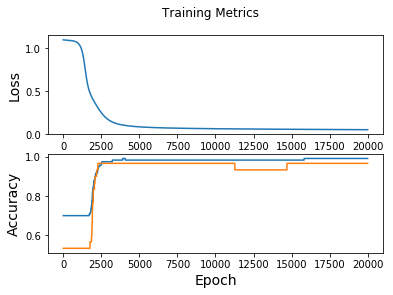

In [5]:
## Note: Rerunning this cell uses the same model variables
# Initialisation des liste qui contiennent l'évolution des métriques par boucle d'entrainement (afin d'afficher des courbes à la fin)
train_loss_results = []
train_accuracy_results = []
test_accuracy_results = []

# Ouverture de la Session TensorFlow
sess = tf.Session()
#Initialisation des variables du modèle
sess.run(tf.global_variables_initializer())
#Indique l'endroit où l'on veut le fichier TensorBoard
summary_writer = tf.summary.FileWriter("C:/Users/julie/Anaconda/Tensor_Flow/1. Iris Training", sess.graph)

#La boucle d'entrainement
for i in range(20000):
        # On appel l'opérateur d'entrainement
        sess.run(train_op, feed_dict={x: features, y: labels})
        # On appel les opérateurs des différentes métriques
        loss_val, summary, accuracy_val = sess.run([loss,merged,accuracy], feed_dict={x: features, y: labels})
        # On écrit les valeurs des variables de la boucle actuelle dans Tensorboard
        summary_writer.add_summary(summary, i)

        # On récupère le taux de prédiction sur les données test
        test_accuracy_val = sess.run([accuracy], feed_dict={x: features_test, y: labels_test})[0]
        
        #On ajoute les valeurs des métrriques de la boucle aux listes
        train_loss_results.append(loss_val)
        train_accuracy_results.append(accuracy_val)
        test_accuracy_results.append(test_accuracy_val)
        
        #On affiche les valeurs toutes les boucles multiple de 10
        if i % 10 == 0:
            print(" Epoch :", i," Loss: ", loss_val," Accuracy: ", accuracy_val,"Accuracy Test: ",test_accuracy_val)
            

# Affichage des tableaux qui récapitulent la variation des métriques durant l'entrainement
fig, axes = plt.subplots(2)
fig.suptitle('Training Metrics')

axes[0].set_ylabel("Loss", fontsize=14)
axes[0].plot(train_loss_results)

axes[1].set_ylabel("Accuracy", fontsize=14)
axes[1].set_xlabel("Epoch", fontsize=14)
axes[1].plot(train_accuracy_results)
axes[1].plot(test_accuracy_results)
plt.show()

# Exportation du modèle pour l'utiliser sous Android

In [6]:
# Sauvegarde les variables du modèle sous forme de checkpoint (.ckpt)
saver.save(sess, './iris_model.ckpt')
# Sauvegarde le graphe du modèle sous forme de Graph_Def
tf.train.write_graph(sess.graph_def, ".", 'iris_model.pbtxt')

# Ce sont les nom et adresse, et valeurs que l'on vas utiliser dans les script d'optimisations du modèle
MODEL_NAME = 'iris_model'
input_graph_path = MODEL_NAME+'.pbtxt'
checkpoint_path = './'+MODEL_NAME+'.ckpt'
input_saver_def_path = ""
input_binary = False
output_node_names = "softmax/final_result"
restore_op_name = "save/restore_all"
filename_tensor_name = "save/Const:0"
output_frozen_graph_name = 'frozen_'+MODEL_NAME+'.pb'
output_optimized_graph_name = 'optimized_'+MODEL_NAME+'.pb'
clear_devices = True

# Permet de geler le graphe, 
freeze_graph.freeze_graph(input_graph_path, input_saver_def_path,
                         input_binary, checkpoint_path,output_node_names,
                         restore_op_name,filename_tensor_name,
                         output_frozen_graph_name,clear_devices,"")

# Ouvre et charge le fichier du modèle gelé
input_graph_def = tf.GraphDef()
with tf.gfile.Open(output_frozen_graph_name,"rb") as f:
    data = f.read()
    input_graph_def.ParseFromString(data)

# Permet d'appliquer des optimisations au modèle
output_graph_def = optimize_for_inference_lib.optimize_for_inference(input_graph_def,
                                                                    ["input"],
                                                                    ["softmax/final_result"],
                                                                    tf.float32.as_datatype_enum)
# On écrit et on sauvegarde les modifications dans un nouveau fichier
f = tf.gfile.FastGFile(output_optimized_graph_name,"w")
f.write(output_graph_def.SerializeToString())



INFO:tensorflow:Restoring parameters from ./iris_model.ckpt
INFO:tensorflow:Froze 6 variables.
Converted 6 variables to const ops.


# Test

In [7]:
# Pour afficher le test final, on procède la même facons que précédemment
test_accuracy_val = sess.run([accuracy], feed_dict={x: features_test, y:labels_test})[0]
print ("Test accuracy:", test_accuracy_val)

Test accuracy: 0.966667


# Prediction

Tenter de prédire des données non labelisée.

In [8]:
# Les noms des classes de fleurs
class_ids = ["Iris setosa", "Iris versicolor", "Iris virginica"]

#Les données dont on ne connait pas le résultat
features_pred = np.array ([    
    [5.1, 3.3, 1.7, 0.5,],
    [5.9, 3.0, 4.2, 1.5,],
    [6.9, 3.1, 5.4, 2.1]])

# Pour afficher les probabilité des sorties après le softmax
softmax_val = sess.run([softmax], feed_dict={x: features_pred})[0]
print("Softmax:" ,(softmax_val*100))
# Pour afficher les labels et les classes que le réseau à prédit.
predictions = sess.run([pred], feed_dict={x: features_pred})[0]
print (predictions)
for i in (predictions):
    print (class_ids[predictions[i]])


Softmax: [[  9.96589890e+01   3.41007948e-01   8.64718863e-17]
 [  4.87458659e-03   9.99044952e+01   9.06335041e-02]
 [  7.99063713e-08   1.42146659e+00   9.85785294e+01]]
[0 1 2]
Iris setosa
Iris versicolor
Iris virginica
